<H1>INFOSYS SPRINGBOARD - BREAST CANCER DETECTION USING ADABOOST CLASSIFIER PROJECT <U>(WITHOUT SMOTE WITHOUT OUTLIER)</U></H1>
<H4>Installing the necesssary libraries</H4>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<h2>DATA PREPROCESSING</h2>

<h4>Reading the CSV file and naming the Columns</h4>

In [2]:
columns = ['ID', 'Diagnosis'] + ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
data= pd.read_csv(r"C:\Users\91949\OneDrive\Desktop\infosys intern\breast+cancer+wisconsin+diagnostic\wdbc.data",header=None,names=columns)

<h4><b>head()</b> is used to display the top 5 rows in the datasets</h4>

In [3]:
data.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h4><b>drop()</b> the Noisy data</h4>

In [4]:
data=data.drop("ID",axis=1)

<h4><b>tail()</b> is used to display the bottom 5 rows in the dataset</h4>

In [5]:
data.tail()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


<h2>ENCODING CATEGORICAL LABELS</h2>

<h4>Here, <b>map()</b> is used to replace the values of M & B with 1 & 0.</h4>

In [6]:
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

<h4>tail(<b>3</b>) is used to display the last 3 rows after <i>mapping</i> </h4>

In [7]:
data.tail(3)

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


<H2>HANDLING MISSING VALUES</H2>

<h4><b>shape</b> is used to find the dimensions for the dataset</h4>

In [8]:
data.shape

(569, 31)

<h4><b>info()</b> is used to find the summary of DataFrame</h4>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

<h4><b>isnull().sum()</b> is used to find the total number of null values in the dataset</h4>

In [10]:
data.isnull().sum()

Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<h4><b>describe()</b> command in pandas is used to generate a summary of statistical information for numerical columns in a DataFrame and <b>T</b> is used transpose the results</h4>

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


<h4><b>unique</b> values in each columns</h4>

In [12]:
unique_columns=data.nunique()
print(unique_columns)

Diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave_points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave_points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave_points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64


<h4>Duplicate Rows</h4>

In [13]:
num_total_rows = len(data)
num_duplicate_rows = data.duplicated().sum()
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100
print(f"Number of Rows with Duplicates: {num_duplicate_rows}")
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")

Number of Rows with Duplicates: 0
Percentage of Duplicate Rows: 0.00%


<h2>DATA NORMALIZATION</h2>

In [14]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant for the intercept
X = sm.add_constant(data.drop('Diagnosis', axis=1))

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print("VIF Values:")
print(vif_data)


VIF Values:
                    Feature          VIF
0                     const  1868.188844
1               radius_mean  3806.115296
2              texture_mean    11.884048
3            perimeter_mean  3786.400419
4                 area_mean   347.878657
5           smoothness_mean     8.194282
6          compactness_mean    50.505168
7            concavity_mean    70.767720
8       concave_points_mean    60.041733
9             symmetry_mean     4.220656
10   fractal_dimension_mean    15.756977
11                radius_se    75.462027
12               texture_se     4.205423
13             perimeter_se    70.359695
14                  area_se    41.163091
15            smoothness_se     4.027923
16           compactness_se    15.366324
17             concavity_se    15.694833
18        concave_points_se    11.520796
19              symmetry_se     5.175426
20     fractal_dimension_se     9.717987
21             radius_worst   799.105946
22            texture_worst    18.569966
23  

In [15]:
sel_data= pd.read_csv(r"vif10.csv")
sel_data.head()

,Diagnosis,texture_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,area_worst,smoothness_worst,concavity_worst,symmetry_worst
0,1,10.38,0.11840,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,2019.0,0.1622,0.7119,0.4601
1,1,17.77,0.08474,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,1956.0,0.1238,0.2416,0.2750
2,1,21.25,0.10960,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,1709.0,0.1444,0.4504,0.3613
3,1,20.38,0.14250,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,567.7,0.2098,0.6869,0.6638
4,1,14.34,0.10030,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,1575.0,0.1374,0.4000,0.2364


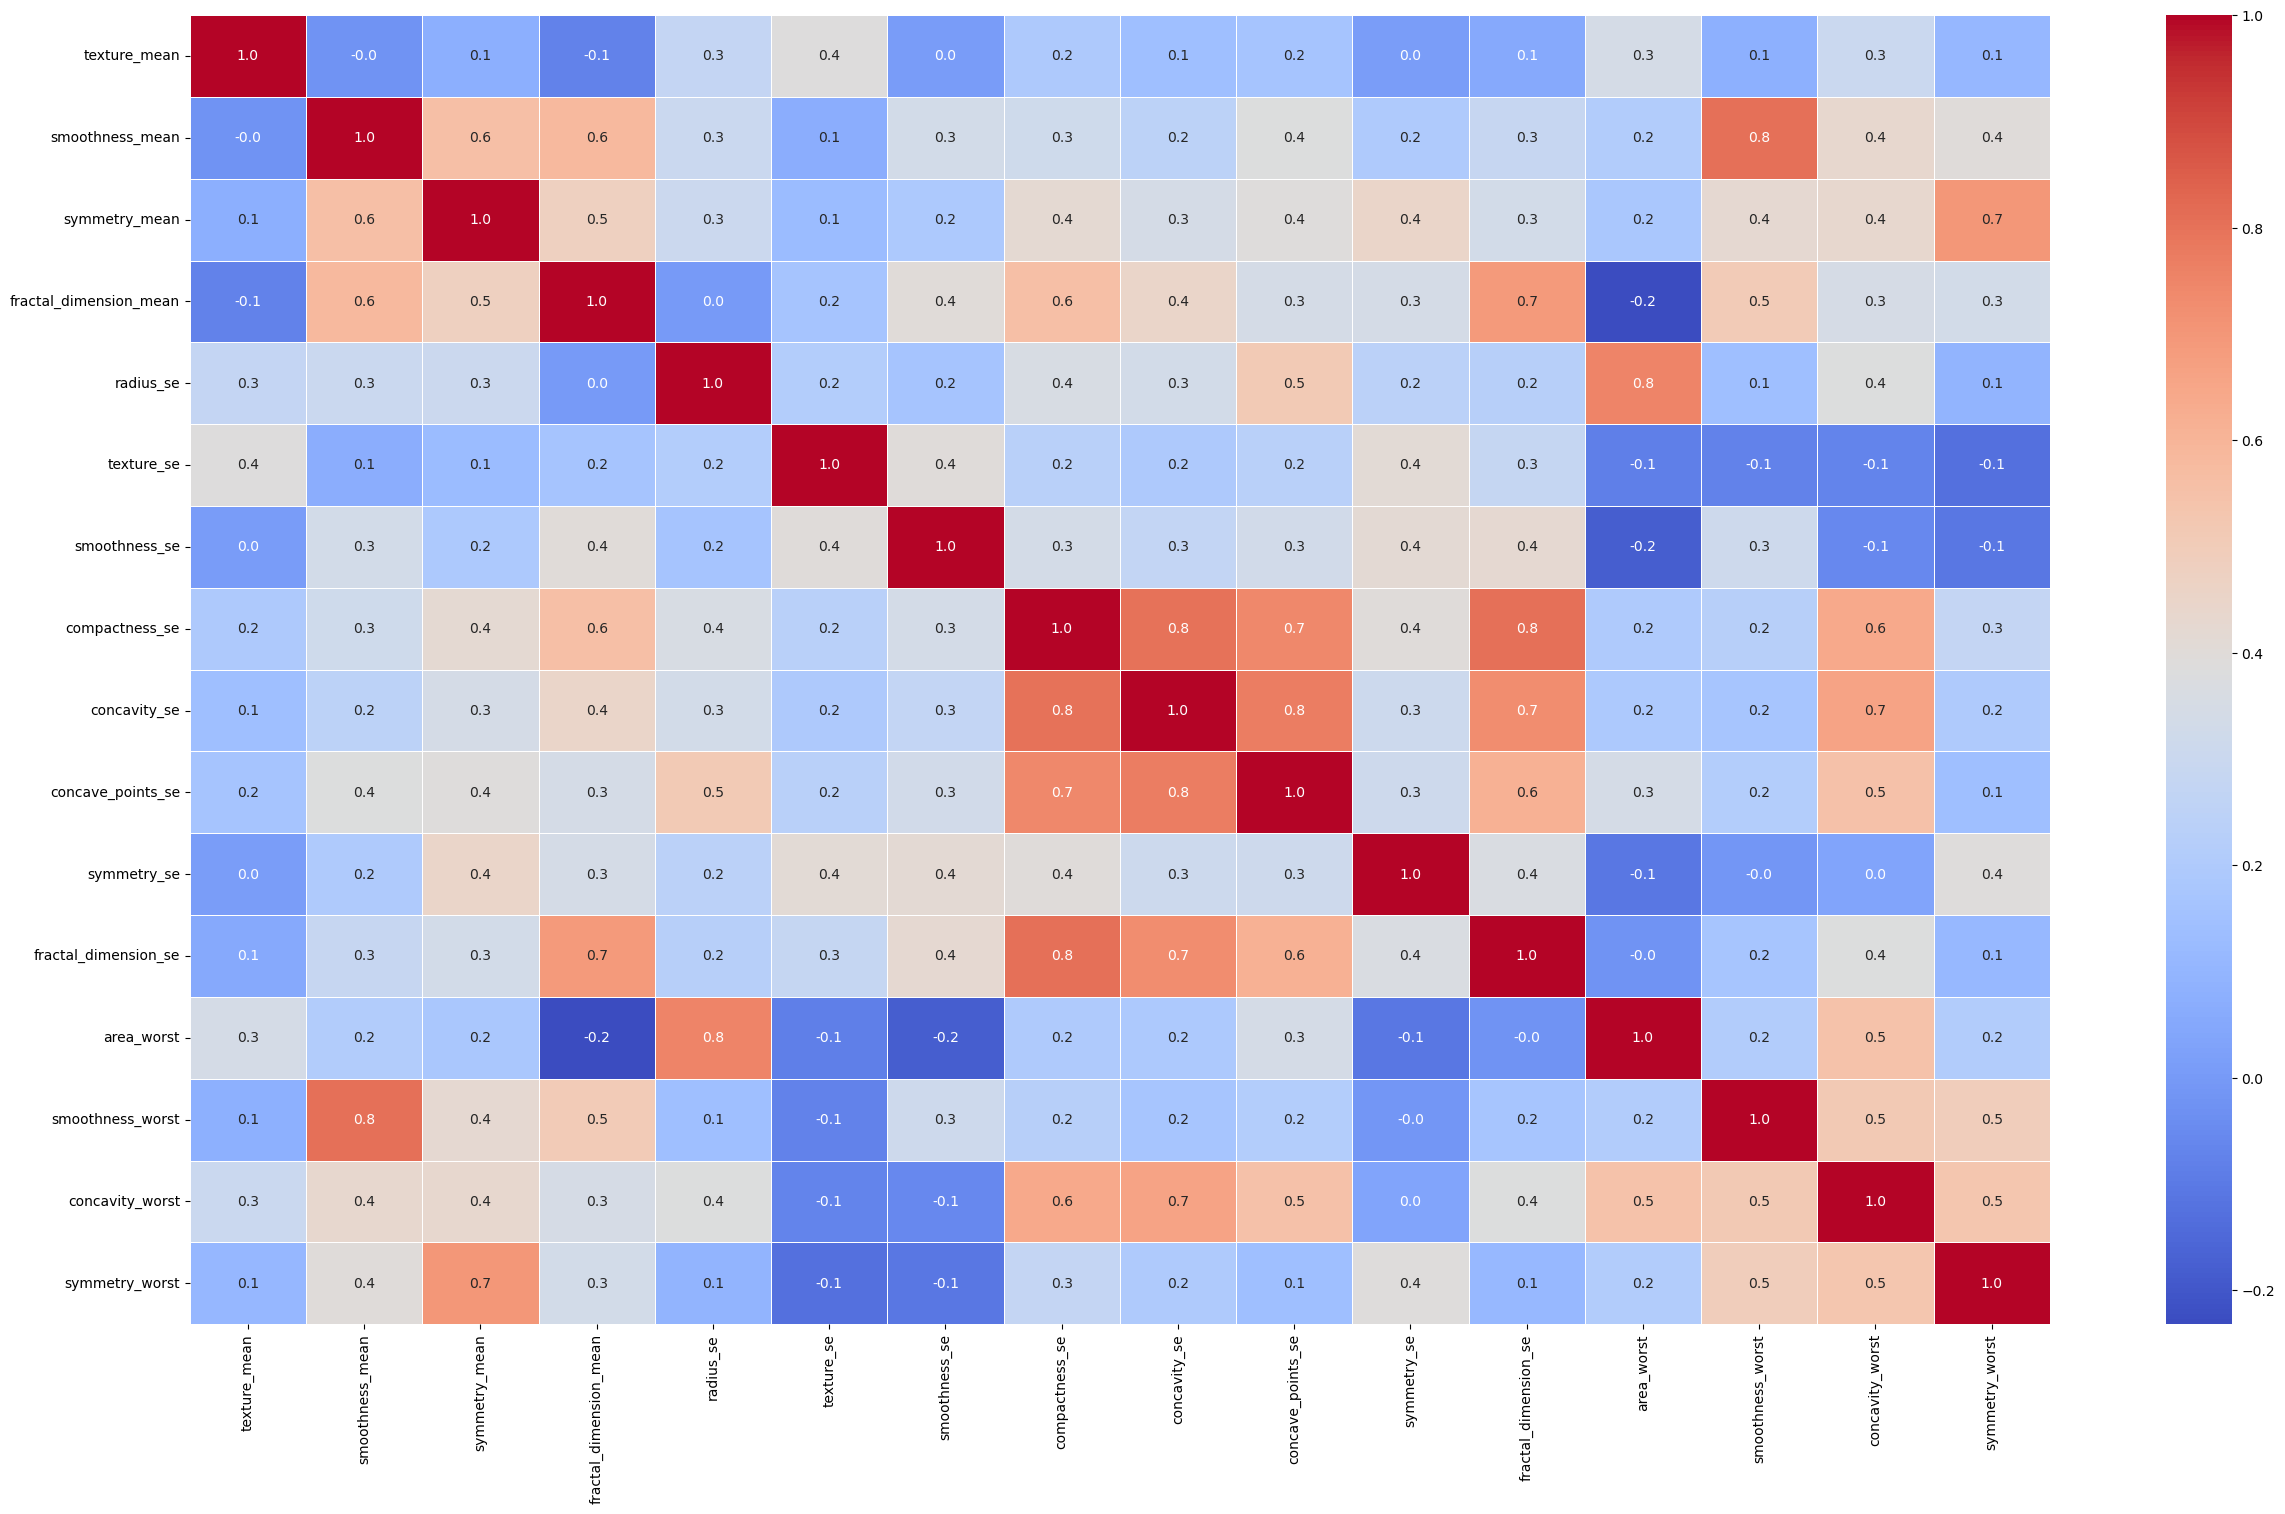

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 17))

# Generate the heatmap for correlation matrix with annotations
sns.heatmap(sel_data.drop('Diagnosis',axis=1).corr(), annot=True, cmap='coolwarm', fmt='.01f', linewidths=0.5)

# Show the plot
plt.show()


<h2>HANDLING OUTLIERS</h2>

In [17]:
def detect_outliers_iqr(df):
    outliers = pd.DataFrame()
    for column in df.columns:
        if np.issubdtype(df[column].dtype, np.number):  # Only apply to numeric columns
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Identify outliers
            outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            outliers = pd.concat([outliers, outliers_in_column], axis=0)
    return outliers.drop_duplicates()

outliers = detect_outliers_iqr(sel_data)
print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 148


In [18]:
outliers = outliers[outliers.index.isin(data.index)] 
sel_data=sel_data.drop(outliers.index,axis=0)
print(sel_data)

     Diagnosis  texture_mean  smoothness_mean  symmetry_mean  \
2            1         21.25          0.10960         0.2069   
4            1         14.34          0.10030         0.1809   
5            1         15.70          0.12780         0.2087   
6            1         19.98          0.09463         0.1794   
7            1         20.83          0.11890         0.2196   
..         ...           ...              ...            ...   
554          0         28.92          0.08123         0.1566   
555          0         27.61          0.09030         0.1593   
558          0         22.68          0.08473         0.1454   
560          0         27.15          0.09929         0.1537   
566          1         28.08          0.08455         0.1590   

     fractal_dimension_mean  radius_se  texture_se  smoothness_se  \
2                   0.05999     0.7456      0.7869       0.006150   
4                   0.05883     0.7572      0.7813       0.011490   
5                   0.07

<h2>DATA VISUALIZATION</h2>

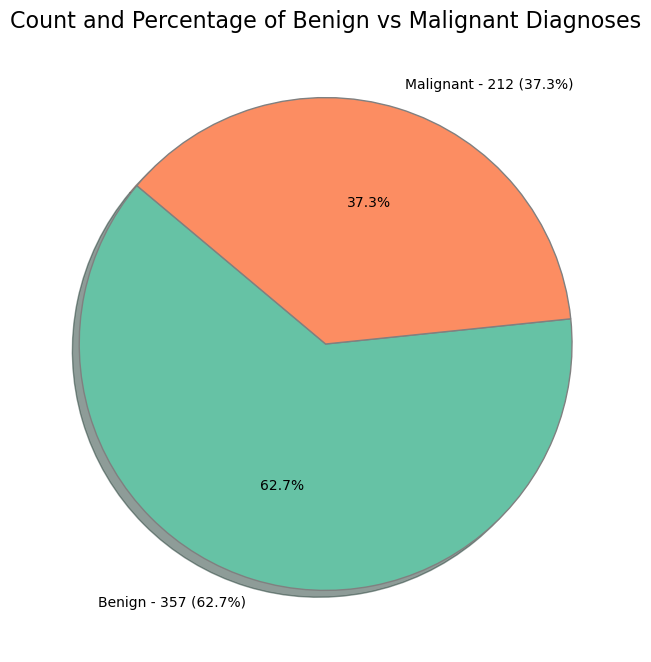

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map 1 to "Malignant" and 0 to "Benign"
data['Diagnosis'] = data['Diagnosis'].map({1: 'Malignant', 0: 'Benign'})

# Calculate counts and prepare labels with counts and percentages
counts = data['Diagnosis'].value_counts()
labels = [f'{label} - {count} ({count / sum(counts) * 100:.1f}%)' for label, count in zip(counts.index, counts)]

# Use a color palette for distinct colors
colors = sns.color_palette("Set2", len(counts))

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',       # Show percentage on each slice
    startangle=140,          # Rotate for better readability
    colors=colors,           # Apply color palette
    wedgeprops={'edgecolor': 'gray'},  # Edge around slices
    shadow=True              # Add shadow for 3D effect
)

plt.title("Count and Percentage of Benign vs Malignant Diagnoses", fontsize=16)
plt.show()


In [20]:
from sklearn.preprocessing import StandardScaler

x=sel_data.drop(columns=['Diagnosis'])  #splitting features and target
y=sel_data['Diagnosis']
scaler=StandardScaler()  #mean and standard deviation of data
x_scaled=scaler.fit_transform(x)

x_scaled_df=pd.DataFrame(x_scaled,columns=x.columns)
print(x_scaled_df.head())

   texture_mean  smoothness_mean  symmetry_mean  fractal_dimension_mean  \
0      0.664263         1.302405       1.498119               -0.254553   
1     -1.096687         0.535887       0.276854               -0.484605   
2     -0.750104         2.802471       1.582668                2.946350   
3      0.340615         0.068558       0.206397               -0.764238   
4      0.557230         2.068922       2.094660                2.625070   

   radius_se  texture_se  smoothness_se  compactness_se  concavity_se  \
0   2.660603   -0.757992      -0.129893        1.750423      0.867132   
1   2.734464   -0.771445       2.563679        0.366989      2.075063   
2   0.042988   -0.509838       0.556110        1.158546      0.763001   
3   0.757404   -0.790903      -1.055998       -0.599176     -0.159869   
4   1.628457    0.659585       1.209327        0.875591     -0.007576   

   concave_points_se  symmetry_se  fractal_dimension_se  area_worst  \
0           2.488461     0.719220      

<h2>Splitting the data</h2>

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [22]:
print(f"Train data: {x_train.shape}")
print(f"Test data: {x_test.shape}")

Train data: (336, 16)
Test data: (85, 16)


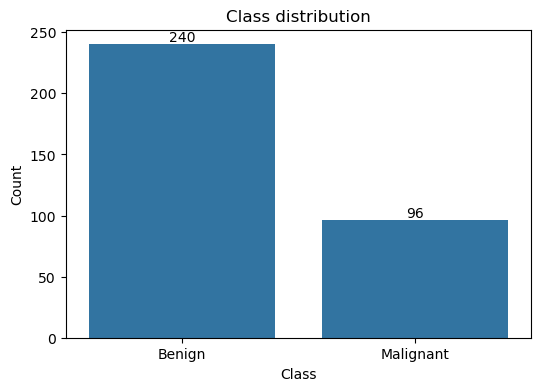

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title("Class distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ["Benign", "Malignant"])  # Sets labels for x-axis ticks

# Adding count annotations on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

plt.show()


<h2>Implementing the ADABOOST classifer</h2>

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


base_classifier=DecisionTreeClassifier(max_depth=1)
ada_boost=AdaBoostClassifier(estimator=base_classifier,n_estimators=50,algorithm='SAMME',random_state=42)
ada_boost.fit(x_train,y_train)
y_pred=ada_boost.predict(x_test)

<h3>Calculating the matrix</h3>

In [25]:
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
accuracy = accuracy_score(y_test, y_pred)


In [26]:
y_pred = ada_boost.predict(x_test)

In [27]:
y_test.head()


208    0
452    0
249    0
497    0
555    0
Name: Diagnosis, dtype: int64

<h2>RESULT</h2>

In [28]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9764705882352941
Precision: 1.0
Recall: 0.92
F1 Score: 0.9583333333333334


<h3>Confusion Matrix</h3>

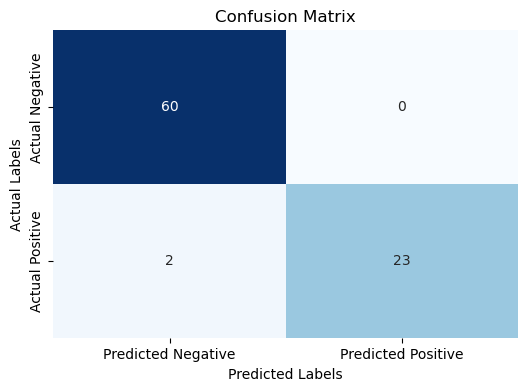

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()


<h3>Classification Report</h3>

In [30]:
from sklearn.metrics import classification_report

# Generate the classification report
report_smote = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", report_smote)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       1.00      0.92      0.96        25

    accuracy                           0.98        85
   macro avg       0.98      0.96      0.97        85
weighted avg       0.98      0.98      0.98        85



<h2>Hyperparameter Tuning
</h2>

In [31]:
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],       # Added more values for boosting rounds
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0,1.1,1.2,1.3,1.4, 1.5,1.6,1.7,1.8,1.9,2],  # Added more values for learning rate
}

<h3>Grid Search with cross-validation
</h3>

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0, 1.1,
                                           1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
                                           1.9, 2],
                         'n_estimators': [50, 100, 200, 300, 400, 500]},
             scoring='accuracy', verbose=1)

<h3>Best Parameters and Model</h3>


In [33]:
# Best Parameters and Model
print("\nBest Parameters from Grid Search:")
print(grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters from Grid Search:
{'learning_rate': 1.6, 'n_estimators': 400}


In [34]:
y_pred_best = best_model.predict(x_test)

<h3>Re-evaluate the tuned model</h3>

In [35]:
y_test.head()

208    0
452    0
249    0
497    0
555    0
Name: Diagnosis, dtype: int64

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, pos_label=1)
recall_best = recall_score(y_test, y_pred_best, pos_label=1)
f1_best = f1_score(y_test, y_pred_best, pos_label=1)

print(f"Accuracy: {accuracy_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"F1 Score: {f1_best}")


Accuracy: 0.9882352941176471
Precision: 1.0
Recall: 0.96
F1 Score: 0.9795918367346939


<h3>Classification Report-After Hypertuning the model</h3>

In [37]:
print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred_best, target_names=["Benign", "Malignant"]))


Classification Report for Best Model:
              precision    recall  f1-score   support

      Benign       0.98      1.00      0.99        60
   Malignant       1.00      0.96      0.98        25

    accuracy                           0.99        85
   macro avg       0.99      0.98      0.99        85
weighted avg       0.99      0.99      0.99        85



<h3>ROC Curve</h3>

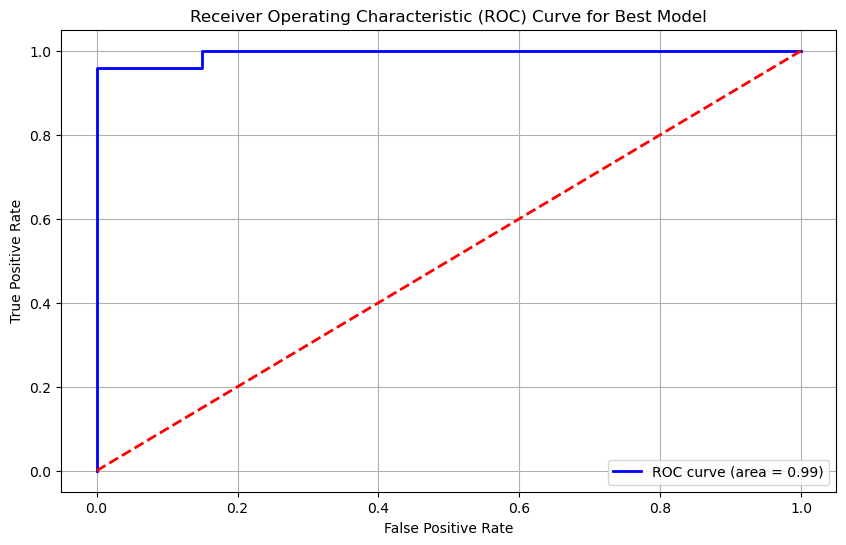

In [38]:
from sklearn.metrics import roc_curve, auc
# ROC Curve for the Best Model
# Get predicted probabilities
y_pred_proba_best = best_model.predict_proba(x_test)[:, 1]  # Probability of the positive class
# Calculate ROC curve
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_proba_best)
# Calculate the AUC
roc_auc_best = auc(fpr_best, tpr_best)
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_best, tpr_best, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_best))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Model')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [39]:
import pickle

filename='best_trained_model.sav'

filename = 'best_trained_model.sav'
model_data = {
    'scaler': scaler,
    'model': best_model,
    'metrics': {
        'accuracy': accuracy,
        'precision': precision,
        'f1_score': f1
    }
}

# 4. Save the dictionary to a file
pickle.dump(model_data, open(filename, 'wb'))
print(f"Model, scaler, and metrics saved to {filename}")

Model, scaler, and metrics saved to best_trained_model.sav


In [40]:
loaded_model = pickle.load(open('best_trained_model.sav', 'rb'))